In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_html('file:///C:/Users/ojjy1/Documents/kcl/Neuroventis%20Dashboard.html')

In [3]:
df = pd.DataFrame(data[0])
df

,Videos,Date,Treatment,Type,Patient nomenclature,Aura,Duration,During sleep,Triggers,Post-seizure reactions,Emergency treatments,Location,Remarks
0,NaN,16/12/202308:47,20-05:DEM600,Generalized atonic seizure,petite crise,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,16/12/202307:02,20-05:DEM600,Focal aware seizure,Focal aware seizure,Yes,3 minutes,No,"Stress, Forgot to take meds",1-2h to recover,NaN,At work,NaN
2,NaN,16/12/202306:23,20-05:DEM600,Focal aware seizure,Focal aware seizure,No,2 minutes,Yes,"Forgot to take meds, Stress",1 day to recover,NaN,In transport / commute,NaN
3,NaN,14/12/202315:16,20-05:DEM600,Focal aware seizure,Focal aware seizure,No,2 minutes,No,Forgot to take meds,"Confusion, Fatigue",NaN,NaN,NaN
4,NaN,13/12/202309:43,20-05:DEM600,Focal aware seizure,Focal aware seizure,Yes,4 minutes,No,Visual stimuli,"Nausea, Fatigue",Diazepam,At home,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,NaN,04/01/202019:00,26-11:DEM400,Focal Arm,Focal Arm,Yes,a minute,No,NaN,1-2h to recover,NaN,NaN,NaN
306,NaN,25/12/201921:00,26-11:DEM400,Focal Arm,Focal Arm,Yes,3 minutes,No,Period,"1-2h to recover, Headache",NaN,NaN,NaN
307,NaN,25/12/201915:00,26-11:DEM400,Generalized tonic-clonic seizure,Generalized tonic-clonic seizure,Yes,4 minutes,No,"Stress, Period","1 day to recover, Fatigue, Headache, Muscle so...",NaN,NaN,"On biggest day of my period, brought to hospit..."
308,NaN,24/12/201911:00,26-11:DEM400,Focal Arm,Focal Arm,Yes,NaN,No,"Period, Stress, Tired","1-2h to recover, Headache",NaN,NaN,NaN


In [4]:
df.to_csv('helpilepsey_raw_data.csv')

In [5]:
df_red = df[['Date', 'Type']]
df_red

,Date,Type
0,16/12/202308:47,Generalized atonic seizure
1,16/12/202307:02,Focal aware seizure
2,16/12/202306:23,Focal aware seizure
3,14/12/202315:16,Focal aware seizure
4,13/12/202309:43,Focal aware seizure
...,...,...
305,04/01/202019:00,Focal Arm
306,25/12/201921:00,Focal Arm
307,25/12/201915:00,Generalized tonic-clonic seizure
308,24/12/201911:00,Focal Arm


In [6]:
df_red.to_csv('helpilepsey_seizure_data.csv')

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    310 non-null    object
 1   Type    310 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


In [8]:
type(df_red.Date[0])

str

In [9]:
for i in df_red.index:
    #date = df_red.Date[i]
    #date = date[:10]+' '+date[10:]
    df_red.Date[i] = dt.datetime.strptime(df_red.Date[i], '%d/%m/%Y%H:%M')

In [10]:
df_red

,Date,Type
0,2023-12-16 08:47:00,Generalized atonic seizure
1,2023-12-16 07:02:00,Focal aware seizure
2,2023-12-16 06:23:00,Focal aware seizure
3,2023-12-14 15:16:00,Focal aware seizure
4,2023-12-13 09:43:00,Focal aware seizure
...,...,...
305,2020-01-04 19:00:00,Focal Arm
306,2019-12-25 21:00:00,Focal Arm
307,2019-12-25 15:00:00,Generalized tonic-clonic seizure
308,2019-12-24 11:00:00,Focal Arm


# Get how long we are going over on the date and create a list of each day value

In [11]:
delta = df_red.Date[0] - df_red.Date[len(df_red)-1]
delta

datetime.timedelta(days=1453, seconds=46020)

In [12]:
d = pd.date_range(df_red.Date[len(df_red)-1].date(), df_red.Date[0].date(),freq='d')
d

DatetimeIndex(['2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01',
               ...
               '2023-12-07', '2023-12-08', '2023-12-09', '2023-12-10',
               '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
               '2023-12-15', '2023-12-16'],
              dtype='datetime64[ns]', length=1455, freq='D')

In [13]:
t = pd.date_range(dt.datetime(1999, 1, 1, 0, 0, 0, 0), dt.datetime(1999, 1, 1, 23, 59, 59, 99999), freq='h')
tt = [i.hour for i in t]

In [14]:
tt[0]

0

In [15]:
tt

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

# Now make the data by extracting the hour from the date column

In [16]:
dtmp = [i.date() for i in d]

In [17]:
to_plot = {}
df_dates = [i.date() for i in df_red.Date]
for i in df_red.Date:
    date = i.date()
    if date not in to_plot.keys():
        to_plot[date] = []
    else:
        pass
    to_plot[date] += [i.hour]

# Need to figure out a method for plotting the doubles before we consider what kind of plot to make

In [18]:
to_plot

{datetime.date(2023, 12, 16): [8, 7, 6],
 datetime.date(2023, 12, 14): [15],
 datetime.date(2023, 12, 13): [9],
 datetime.date(2023, 12, 6): [5],
 datetime.date(2023, 12, 4): [19],
 datetime.date(2023, 12, 1): [10],
 datetime.date(2023, 11, 29): [22, 22, 21],
 datetime.date(2023, 11, 24): [19],
 datetime.date(2023, 11, 22): [5],
 datetime.date(2023, 11, 19): [3],
 datetime.date(2023, 11, 17): [22, 3],
 datetime.date(2023, 11, 13): [21],
 datetime.date(2023, 11, 11): [20],
 datetime.date(2023, 11, 9): [3, 3],
 datetime.date(2023, 11, 8): [23],
 datetime.date(2023, 11, 7): [5, 0],
 datetime.date(2023, 11, 6): [21, 0, 0],
 datetime.date(2023, 11, 5): [22, 22, 0],
 datetime.date(2023, 11, 4): [19, 3],
 datetime.date(2023, 11, 3): [5],
 datetime.date(2023, 10, 31): [23],
 datetime.date(2023, 10, 29): [3, 0],
 datetime.date(2023, 10, 14): [22],
 datetime.date(2023, 10, 13): [6],
 datetime.date(2023, 10, 12): [22],
 datetime.date(2023, 10, 11): [0],
 datetime.date(2023, 10, 10): [21],
 dateti

In [19]:
for i in d:
    if i.date() not in to_plot.keys():
        to_plot[i.date()] = []

In [20]:
to_plot

{datetime.date(2023, 12, 16): [8, 7, 6],
 datetime.date(2023, 12, 14): [15],
 datetime.date(2023, 12, 13): [9],
 datetime.date(2023, 12, 6): [5],
 datetime.date(2023, 12, 4): [19],
 datetime.date(2023, 12, 1): [10],
 datetime.date(2023, 11, 29): [22, 22, 21],
 datetime.date(2023, 11, 24): [19],
 datetime.date(2023, 11, 22): [5],
 datetime.date(2023, 11, 19): [3],
 datetime.date(2023, 11, 17): [22, 3],
 datetime.date(2023, 11, 13): [21],
 datetime.date(2023, 11, 11): [20],
 datetime.date(2023, 11, 9): [3, 3],
 datetime.date(2023, 11, 8): [23],
 datetime.date(2023, 11, 7): [5, 0],
 datetime.date(2023, 11, 6): [21, 0, 0],
 datetime.date(2023, 11, 5): [22, 22, 0],
 datetime.date(2023, 11, 4): [19, 3],
 datetime.date(2023, 11, 3): [5],
 datetime.date(2023, 10, 31): [23],
 datetime.date(2023, 10, 29): [3, 0],
 datetime.date(2023, 10, 14): [22],
 datetime.date(2023, 10, 13): [6],
 datetime.date(2023, 10, 12): [22],
 datetime.date(2023, 10, 11): [0],
 datetime.date(2023, 10, 10): [21],
 dateti

In [40]:
to_plot[list(to_plot.keys())[0]]

[8, 7, 6]

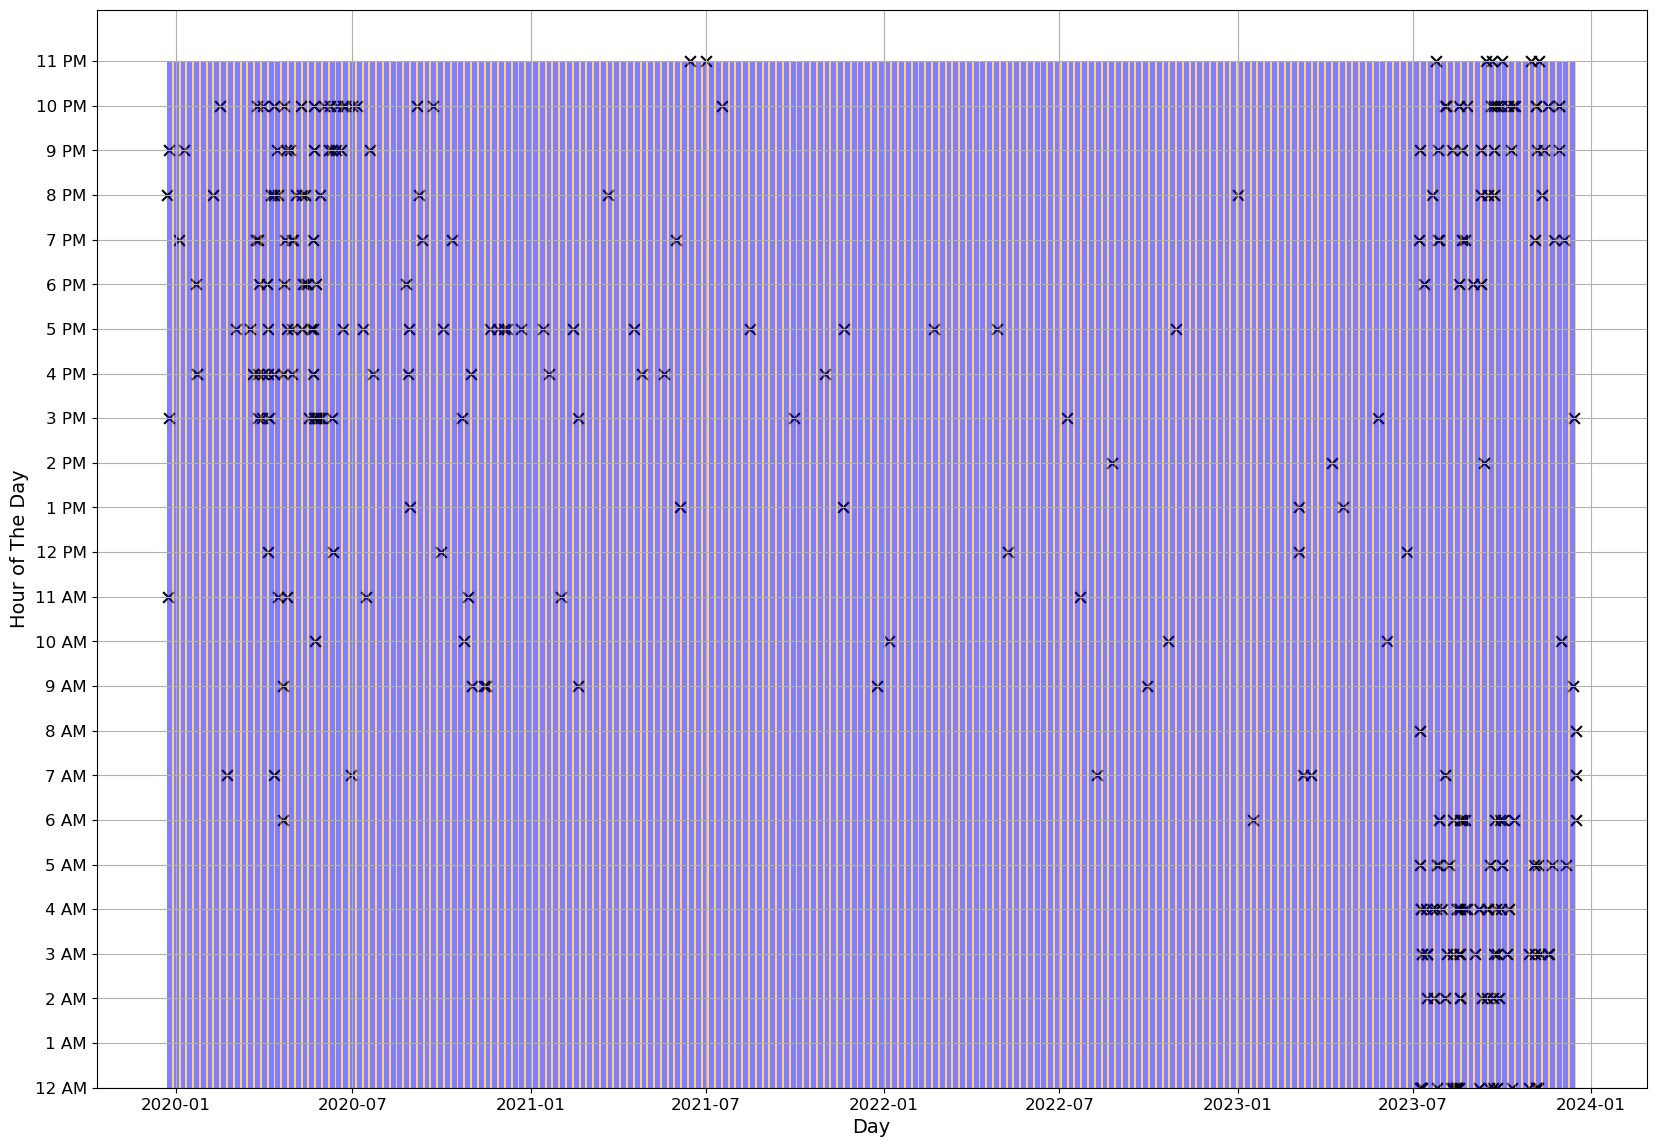

In [54]:
plt.figure(figsize=(20,14))
for xe, ye in zip(to_plot.keys(), to_plot.values()):
    for i in ye:
        plt.scatter(xe, i, color='black', marker='x',s=60)
    #plt.scatter([xe] * len(ye), ye, color='black', marker='x')
    #plt.scatter(xe, ye, color='black')
    #plt.text(xe, ye, '1', color="red", fontsize=12)
    color = 'blue'
    if xe.weekday() in [5, 6]:
        color = 'orange'
    plt.bar(xe, 23, color=color, alpha = 0.5, width=dt.timedelta(days=1))
plt.yticks(tt, labels = ['12 AM']+
           [str(i)+' AM' for i in range(1, 12)]+
           ['12 PM']+
           [str(i)+' PM' for i in range(1, 12)], fontsize = 12)
plt.xticks(fontsize=12)
plt.ylabel('Hour of The Day', fontsize=14)
plt.xlabel('Day', fontsize = 14)
plt.grid()
plt.savefig('helpilepsey_poc.png')
plt.show()